In [ ]:
# Prepare packages and dataset
import pandas as pd



In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:


# Assuming you already have your DataFrame df
# Clean columns name
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# Convert categorical data to numeric data
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1}).infer_objects()
df.head()


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
from sklearn.cluster import KMeans

# Drop unnecessary columns
X = df.drop(['CustomerID', 'gender'], axis=1)

# Create a lists from 2-10.
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, X):
    '''
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Returns each k-value's inertia appended to a list.
    '''
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, n_init=10, random_state=42).fit(X)
        inertia.append(kms.inertia_)

    return inertia

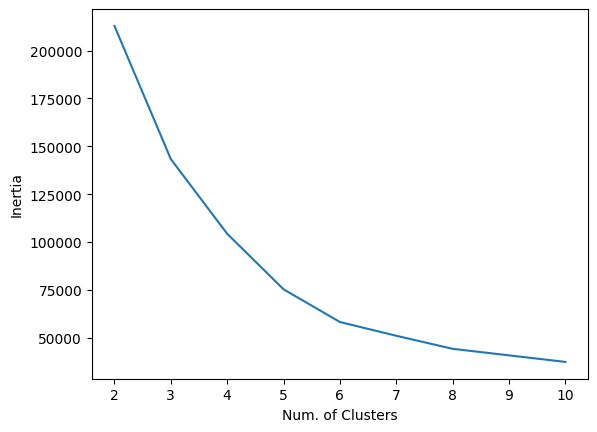

In [ ]:
# Call the function to get the inertia values
inertia = kmeans_inertia(num_clusters, X)

import warnings

# Suppress the FutureWarning related to use_inf_as_na
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns

# Create inertia plot
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel('Num. of Clusters');
plot.set_ylabel('Inertia');

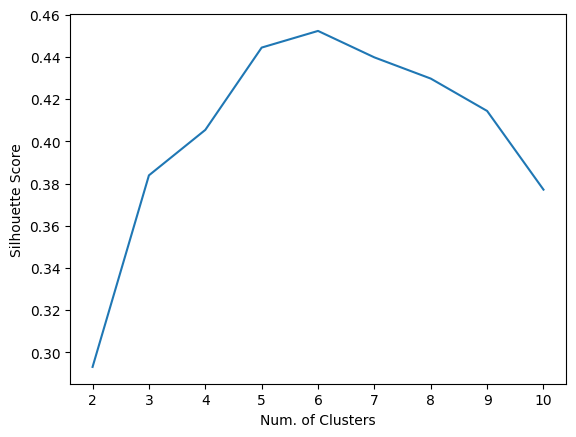

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


# Create a list from 2-10.
num_clusters = [i for i in range(2, 11)]

def kmeans_silhouette(num_clusters, X):
    sil_scores = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, n_init=10, random_state=42).fit(X)
        labels = kms.labels_
        sil_avg = silhouette_score(X, labels)
        sil_scores.append(sil_avg)

    return sil_scores

# Call the function to get the silhouette scores
sil_scores = kmeans_silhouette(num_clusters, X)

# Create silhouette score plot
plot = sns.lineplot(x=num_clusters, y=sil_scores)
plot.set_xlabel('Num. of Clusters')
plot.set_ylabel('Silhouette Score')

plt.show()

In [ ]:
# Fit a 5-cluster model to the data
kms5 = KMeans(n_clusters=5, n_init=10, random_state=42)
kms5.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
print(kms5.labels_[:5])
print('Unique labels:', np.unique(kms5.labels_))

[0 4 0 4 0]
Unique labels: [0 1 2 3 4]


In [ ]:
X['cluster'] = kms5.labels_
X.head()

,age,annual_income,spending_score,cluster
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


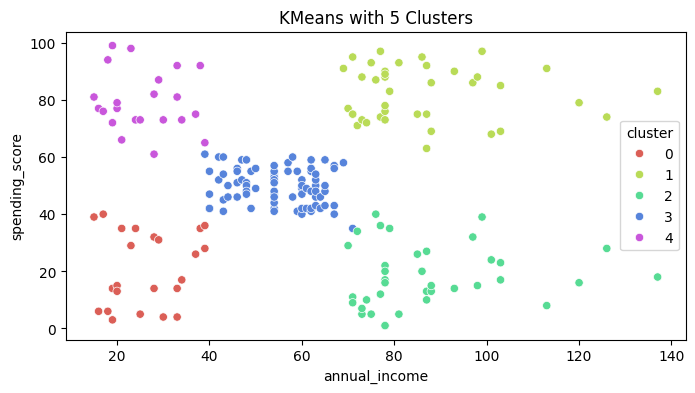

In [ ]:
# Create KMeans object
kms5 = KMeans(n_clusters=5).fit(X)

# Create a KMeans plot with 5 clusters
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['cluster'],
                palette=sns.color_palette('hls',5))
plt.title('KMeans with 5 Clusters')
plt.show()